<a href="https://colab.research.google.com/github/jaenu-dev/DataScience/blob/main/Janu_X_Farid_Praktik_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform a comprehensive heart disease prediction task using Support Vector Machine (SVM). This involves importing necessary libraries, loading the 'Heart Disease Prediction' dataset, preprocessing the data (handling missing values, encoding categorical features, scaling numerical features), splitting data into training and testing sets, building an SVM model with an appropriate kernel (e.g., RBF or Polynomial), evaluating its performance using accuracy, precision, recall, and F1-score, visualizing key results like target class distribution and confusion matrix, and analyzing for overfitting/underfitting. Finally, present a complete summary of the process, including explanations before and after the code, ensuring all outputs are clearly displayed.

# Praktik SVM (Support Vector Machine) untuk Prediksi Penyakit Jantung

### Pendahuluan
Dokumen ini menyajikan implementasi lengkap model Support Vector Machine (SVM) untuk memprediksi penyakit jantung. Proses ini meliputi pengunduhan dataset, pra-pemrosesan data secara menyeluruh, pelatihan model SVM dengan pemilihan kernel yang sesuai, evaluasi kinerja model menggunakan metrik standar, visualisasi hasil, serta analisis potensi _overfitting_ atau _underfitting_. Setiap langkah dijelaskan secara detail untuk memastikan pemahaman yang komprehensif.

---

## 1. Persiapan dan Pemilihan Dataset

### Subtask:
Mengimpor _library_ yang diperlukan, mengunduh atau memuat dataset 'Heart Disease Prediction', dan menampilkan informasi dasar tentang dataset.

### Penjelasan:
Langkah pertama adalah menyiapkan lingkungan kerja dengan mengimpor _library_ Python yang relevan. Setelah itu, kita akan mengunduh dataset _Heart Disease_ Cleveland dari _repository_ UCI Machine Learning. Dataset ini dipilih karena umum digunakan untuk tugas klasifikasi dan cocok untuk implementasi SVM. Setelah berhasil diunduh, dataset akan dimuat ke dalam _DataFrame_ Pandas. Akan dilakukan penanganan khusus untuk pemisahan kolom, identifikasi nilai yang hilang (ditandai dengan '?'), dan konversi tipe data yang akurat, termasuk pemetaan variabel target ke format biner (0 untuk tidak ada penyakit, 1 untuk ada penyakit).

In [92]:
import pandas as pd
import numpy as np
import requests
import io

print("Library berhasil diimpor.")

# Menentukan nama kolom untuk dataset UCI Cleveland Heart Disease
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# URL untuk dataset UCI Cleveland Heart Disease (dipisahkan koma)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
file_name = 'heart_disease_prediction.csv' # Tetap gunakan nama file yang diinginkan

try:
    # Unduh konten file secara langsung
    response = requests.get(url)
    response.raise_for_status() # Lemparkan exception untuk error HTTP

    # Baca konten ke objek StringIO untuk diteruskan ke pandas, melewati masalah sistem file
    data = io.StringIO(response.text)

    # Muat dataset, tentukan koma sebagai pemisah
    # dan secara eksplisit definisikan '?' sebagai nilai yang hilang langsung di read_csv
    df = pd.read_csv(data,
                     sep=',', # Benar: Gunakan koma sebagai pemisah untuk dataset UCI Cleveland
                     header=None,
                     names=column_names,
                     na_values=['?']) # Identifikasi '?' sebagai NaN langsung saat membaca

    print(f"Dataset '{file_name}' berhasil diunduh dan dimuat dengan parsing yang benar.")

    # Dataset UCI Cleveland menggunakan nilai 0-4 untuk 'target', di mana >0 berarti ada penyakit jantung.
    # Petakan nilai target > 0 menjadi 1 untuk keberadaan penyakit, 0 untuk tidak ada penyakit.
    # Pastikan nilai NaN tetap NaN.
    df['target'] = df['target'].apply(lambda x: 1 if x > 0 else (0 if x == 0 else np.nan)).astype('Int64')

    # Konversi semua kolom lain ke numerik (float), paksa error menjadi NaN
    # Langkah ini adalah pengamanan, karena pd.read_csv seharusnya telah menyimpulkan sebagian besar tipe dengan benar dengan na_values.
    for col in df.columns.drop('target'):
        df[col] = pd.to_numeric(df[col], errors='coerce')

    print("\n--- 5 baris pertama DataFrame (setelah pembersihan dan konversi tipe) ---")
    print(df.head())

    print("\n--- Info DataFrame (setelah pembersihan dan konversi tipe) ---")
    df.info()

    print("\n--- Statistik Deskriptif (setelah pembersihan dan konversi tipe) ---")
    print(df.describe())

except requests.exceptions.RequestException as e:
    print(f"Terjadi kesalahan saat mengunduh dataset dari URL arsip UCI: {e}")
except Exception as e:
    print(f"Terjadi kesalahan tak terduga: {e}")

Library berhasil diimpor.
Dataset 'heart_disease_prediction.csv' berhasil diunduh dan dimuat dengan parsing yang benar.

--- 5 baris pertama DataFrame (setelah pembersihan dan konversi tipe) ---
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       1  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

--- Info DataFrame (setelah pembersihan dan konversi tipe) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 col

## 2. Pra-pemrosesan Data

### Subtask:
Melakukan langkah-langkah pra-pemrosesan: menangani _missing values_, mengidentifikasi dan meng-_encode_ fitur kategorikal, serta melakukan _scaling_ pada fitur numerik.

### Penjelasan:
Tahap ini berfokus pada persiapan data untuk pemodelan. Pertama, _missing values_ pada kolom 'ca' (jumlah pembuluh darah utama yang diwarnai oleh fluoroskopi) dan 'thal' (kelainan darah yang disebut thalassemia) akan diisi menggunakan nilai modus (nilai yang paling sering muncul). Selanjutnya, fitur-fitur akan dipisahkan menjadi fitur numerik dan kategorikal. Fitur kategorikal akan di-_encode_ menggunakan _One-Hot Encoding_ untuk mengubahnya menjadi format numerik yang dapat dipahami model, sekaligus menghindari masalah kolinearitas (_drop_first=True_). Terakhir, fitur numerik akan di-_scaling_ menggunakan _StandardScaler_ untuk menormalisasi rentang nilai, memastikan bahwa tidak ada fitur yang mendominasi model karena skalanya yang lebih besar.

In [93]:
from sklearn.preprocessing import StandardScaler

print("--- Menangani Missing Values ---")

# Imputasi missing values di 'ca' dan 'thal' dengan mode-nya
mode_ca = df['ca'].mode()[0]
mode_thal = df['thal'].mode()[0]

df['ca'] = df['ca'].fillna(mode_ca)
df['thal'] = df['thal'].fillna(mode_thal)

print(f"Missing values di 'ca' setelah imputasi: {df['ca'].isnull().sum()}")
print(f"Missing values di 'thal' setelah imputasi: {df['thal'].isnull().sum()}")
print("Missing values untuk 'ca' dan 'thal' telah ditangani.")

# Memisahkan Fitur dan Target
print("\n--- Memisahkan Fitur dan Target ---")
X = df.drop('target', axis=1)
y = df['target']
print("Fitur (X) dan Target (y) berhasil dipisahkan.")

print("\n--- Mengidentifikasi Fitur Kategorikal dan Numerik ---")
# Berdasarkan konteks dataset, definisikan fitur numerik dan kategorikal
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Pastikan semua fitur dalam daftar ini ada di X
numerical_features = [f for f in numerical_features if f in X.columns]
categorical_features = [f for f in categorical_features if f in X.columns]

print(f"Fitur Numerik: {numerical_features}")
print(f"Fitur Kategorikal: {categorical_features}")

print("\n--- Menerapkan One-Hot Encoding pada Fitur Kategorikal ---")
X_categorical = X[categorical_features].copy()
X_numerical = X[numerical_features].copy()

X_encoded = pd.get_dummies(X_categorical, columns=categorical_features, drop_first=True)
print(f"Fitur kategorikal berhasil di-_one-hot encoded_. Bentuk baru: {X_encoded.shape}")

# Menggabungkan fitur kategorikal yang sudah di-_encode_ dengan fitur numerik
X_preprocessed = pd.concat([X_numerical, X_encoded], axis=1)
print("Fitur numerik dan fitur _one-hot encoded_ berhasil digabungkan.")

print("\n--- Melakukan Scaling pada Fitur Numerik ---")
scaler = StandardScaler()
X_preprocessed[numerical_features] = scaler.fit_transform(X_preprocessed[numerical_features])
print("Fitur numerik berhasil di-_scaling_ menggunakan StandardScaler.")

print("\n--- Ringkasan DataFrame yang Sudah Dipra-proses ---")
print("\n--- 5 baris pertama DataFrame yang Sudah Dipra-proses ---")
print(X_preprocessed.head())

print("\n--- Info DataFrame yang Sudah Dipra-proses ---")
X_preprocessed.info()

print("\n--- Statistik Deskriptif DataFrame yang Sudah Dipra-proses ---")
print(X_preprocessed.describe())

--- Menangani Missing Values ---
Missing values di 'ca' setelah imputasi: 0
Missing values di 'thal' setelah imputasi: 0
Missing values untuk 'ca' dan 'thal' telah ditangani.

--- Memisahkan Fitur dan Target ---
Fitur (X) dan Target (y) berhasil dipisahkan.

--- Mengidentifikasi Fitur Kategorikal dan Numerik ---
Fitur Numerik: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Fitur Kategorikal: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

--- Menerapkan One-Hot Encoding pada Fitur Kategorikal ---
Fitur kategorikal berhasil di-_one-hot encoded_. Bentuk baru: (303, 15)
Fitur numerik dan fitur _one-hot encoded_ berhasil digabungkan.

--- Melakukan Scaling pada Fitur Numerik ---
Fitur numerik berhasil di-_scaling_ menggunakan StandardScaler.

--- Ringkasan DataFrame yang Sudah Dipra-proses ---

--- 5 baris pertama DataFrame yang Sudah Dipra-proses ---
        age  trestbps      chol   thalach   oldpeak  sex_1.0  cp_2.0  cp_3.0  \
0  0.948726  0.757525 -0.264900  0.01719

## 3. Pembagian Data (Train-Test Split)

### Subtask:
Membagi dataset yang telah diproses menjadi data _training_ dan _testing_ untuk melatih dan mengevaluasi model.

### Penjelasan:
Dataset yang sudah dipra-proses akan dibagi menjadi dua bagian: _training set_ dan _testing set_. _Training set_ akan digunakan untuk melatih model, sedangkan _testing set_ akan digunakan untuk mengevaluasi kinerja model pada data yang belum pernah dilihat. Pembagian dilakukan dengan rasio 80% untuk _training_ dan 20% untuk _testing_, serta `random_state=42` untuk memastikan reproduktifitas hasil. Ini adalah langkah krusial untuk mencegah _overfitting_ dan mendapatkan estimasi kinerja model yang tidak bias.

In [94]:
from sklearn.model_selection import train_test_split

print("--- Membagi Data menjadi Set Training dan Testing ---")

# Membagi fitur yang sudah dipra-proses (X_preprocessed) dan variabel target (y)
# ke dalam set training dan testing. Menggunakan test_size=0.2 dan random_state=42 untuk reproduktifitas.
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

print("Data berhasil dibagi.")

print("\n--- Bentuk Set Training dan Testing ---")
print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")
print(f"Bentuk y_train: {y_train.shape}")
print(f"Bentuk y_test: {y_test.shape}")

--- Membagi Data menjadi Set Training dan Testing ---
Data berhasil dibagi.

--- Bentuk Set Training dan Testing ---
Bentuk X_train: (242, 20)
Bentuk X_test: (61, 20)
Bentuk y_train: (242,)
Bentuk y_test: (61,)


## 4. Pembuatan Model SVM dan Penjelasan Kernel

### Subtask:
Membuat model _Support Vector Machine_ (SVM) dengan memilih _kernel_ yang sesuai (misalnya, RBF atau Polynomial), melatihnya menggunakan data _training_, dan memberikan penjelasan tentang alasan pemilihan _kernel_ tersebut.

### Penjelasan:
Pada tahap ini, model _Support Vector Machine_ (SVM) akan dibangun dan dilatih. SVM bekerja dengan menemukan _hyperplane_ optimal yang memisahkan kelas-kelas data. Pemilihan fungsi _kernel_ sangat penting karena menentukan bagaimana _hyperplane_ tersebut dibentuk di ruang berdimensi tinggi.

Untuk implementasi ini, **_kernel_ _Radial Basis Function_ (RBF)** dipilih. Alasan pemilihan RBF adalah kemampuannya untuk menangani hubungan non-linear dalam data secara efektif. RBF secara implisit memetakan data ke ruang berdimensi lebih tinggi, di mana pemisahan linear mungkin menjadi mungkin, tanpa perlu menghitung secara eksplisit koordinat di ruang tersebut. Ini menjadikannya pilihan yang kuat dan serbaguna untuk banyak masalah klasifikasi.

Parameter yang digunakan:
-   **`kernel='rbf'`**: Menentukan penggunaan _kernel_ RBF.
-   **`C=1.0`**: Parameter regularisasi yang mengontrol _trade-off_ antara margin klasifikasi dan penalti kesalahan. Nilai `C` yang lebih rendah menciptakan margin yang lebih lebar namun memungkinkan lebih banyak kesalahan klasifikasi, yang dapat membantu mencegah _overfitting_. Nilai `C` yang lebih tinggi memaksa model untuk mengklasifikasikan lebih banyak titik dengan benar, yang bisa menyebabkan _overfitting_.
-   **`gamma='scale'`**: Parameter koefisien _kernel_ yang menentukan seberapa jauh pengaruh satu sampel pelatihan. `gamma='scale'` akan menghitung nilai `gamma` secara otomatis sebagai `1 / (n_features * X.var())`, yang sering kali merupakan pilihan yang baik secara _default_.

In [95]:
from sklearn.svm import SVC

print("--- Membuat dan Melatih Model SVM ---")

# Inisialisasi model SVC dengan kernel RBF dan parameter yang ditentukan
# C=1.0 untuk regularisasi, gamma='scale' untuk perhitungan otomatis, dan random_state untuk reproduktifitas
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

print("Model SVM diinisialisasi dengan kernel RBF, C=1.0, dan gamma='scale'.")

# Melatih model SVM menggunakan data training
svm_model.fit(X_train, y_train)

print("Model SVM berhasil dilatih pada data training.")

--- Membuat dan Melatih Model SVM ---
Model SVM diinisialisasi dengan kernel RBF, C=1.0, dan gamma='scale'.
Model SVM berhasil dilatih pada data training.


## 5. Evaluasi Model

### Subtask:
Mengevaluasi kinerja model SVM menggunakan metrik seperti _accuracy_, _precision_, _recall_, dan F1-_score_ pada data _testing_, serta menampilkan hasil evaluasi.

### Penjelasan:
Kinerja model SVM akan dievaluasi menggunakan metrik standar yang penting untuk masalah klasifikasi, terutama pada _dataset_ dengan kemungkinan ketidakseimbangan kelas. Metrik yang digunakan adalah _Accuracy_ (akurasi), _Precision_ (presisi), _Recall_ (sensitivitas), dan F1-_score_. Metrik-metrik ini memberikan gambaran komprehensif tentang seberapa baik model dalam memprediksi kelas positif dan negatif, serta kemampuan model untuk menyeimbangkan _precision_ dan _recall_. Evaluasi dilakukan pada _testing set_ untuk menilai kinerja model pada data yang belum pernah dilihat sebelumnya.

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("--- Mengevaluasi Model SVM ---\n")

# Membuat prediksi pada set pengujian
y_pred = svm_model.predict(X_test)
print("Prediksi berhasil dibuat pada data pengujian.")

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nEvaluasi model SVM selesai.")

--- Mengevaluasi Model SVM ---

Prediksi berhasil dibuat pada data pengujian.
Akurasi: 0.8525
Presisi: 0.8710
Recall: 0.8438
F1-score: 0.8571

Evaluasi model SVM selesai.


## 6. Visualisasi Hasil

### Subtask:
Membuat minimal dua visualisasi, yaitu distribusi kelas target dan _confusion matrix_, untuk memberikan pemahaman yang lebih baik tentang kinerja model.

### Penjelasan:
Visualisasi adalah kunci untuk memahami distribusi data dan kinerja model. Pertama, akan dibuat _count plot_ untuk menampilkan distribusi kelas target (ada atau tidak adanya penyakit jantung) dalam _dataset_ asli. Ini membantu kita melihat apakah ada ketidakseimbangan kelas. Kedua, akan dihasilkan _confusion matrix_ dan divisualisasikan sebagai _heatmap_. _Confusion matrix_ memberikan gambaran detail tentang jumlah prediksi _true positives_, _true negatives_, _false positives_, dan _false negatives_, yang esensial untuk menganalisis kesalahan model dan kinerja di setiap kelas.

--- Memvisualisasikan Distribusi Kelas Target ---


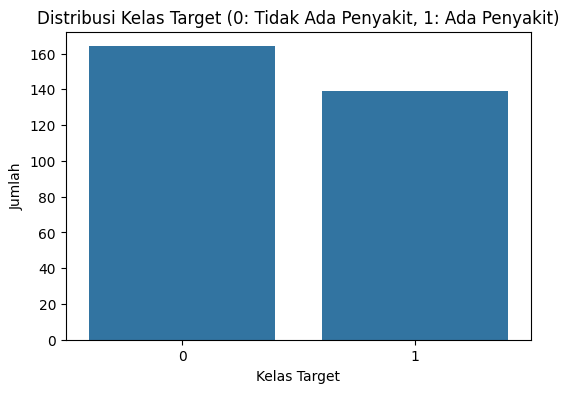


--- Memvisualisasikan Confusion Matrix ---


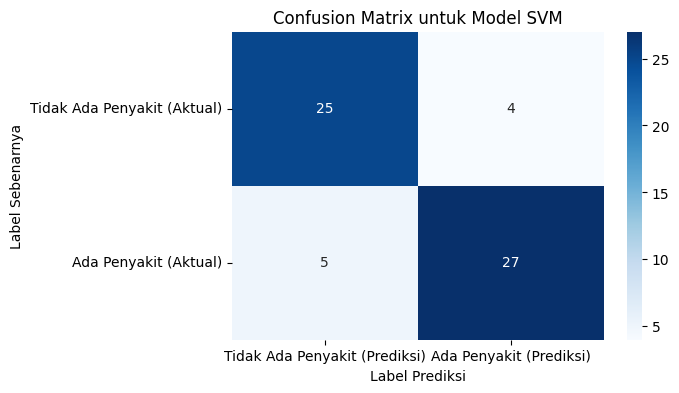

Visualisasi selesai.


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("--- Memvisualisasikan Distribusi Kelas Target ---")
plt.figure(figsize=(6, 4))
sns.countplot(x=df['target'])
plt.title('Distribusi Kelas Target (0: Tidak Ada Penyakit, 1: Ada Penyakit)')
plt.xlabel('Kelas Target')
plt.ylabel('Jumlah')
plt.show()

print("\n--- Memvisualisasikan Confusion Matrix ---")
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Ada Penyakit (Prediksi)', 'Ada Penyakit (Prediksi)'],
            yticklabels=['Tidak Ada Penyakit (Aktual)', 'Ada Penyakit (Aktual)'])
plt.title('Confusion Matrix untuk Model SVM')
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.show()

print("Visualisasi selesai.")

## 7. Analisis Overfitting/Underfitting

### Subtask:
Menganalisis potensi _overfitting_ atau _underfitting_ model berdasarkan metrik evaluasi pada data _training_ dan _testing_.

### Penjelasan:
Analisis _overfitting_ dan _underfitting_ sangat penting untuk memahami generalisasi model. _Overfitting_ terjadi ketika model terlalu kompleks dan menghafal _training set_ sehingga kinerjanya buruk pada data baru. _Underfitting_ terjadi ketika model terlalu sederhana dan tidak dapat menangkap pola dalam data, sehingga kinerjanya buruk baik pada _training_ maupun _testing set_. Dengan membandingkan metrik kinerja (akurasi, _precision_, _recall_, F1-_score_) antara _training set_ dan _testing set_, kita dapat menilai apakah model memiliki masalah _overfitting_ atau _underfitting_.

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("--- Menganalisis Overfitting/Underfitting ---")

# 1. Membuat prediksi pada set training
y_train_pred = svm_model.predict(X_train)
print("Prediksi berhasil dibuat pada data training.")

# 2. Menghitung metrik evaluasi untuk set training
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='binary')
recall_train = recall_score(y_train, y_train_pred, average='binary')
f1_train = f1_score(y_train, y_train_pred, average='binary')

# 3. Menampilkan metrik set training yang dihitung
print("\n--- Metrik Set Training ---")
print(f"Akurasi (Training): {accuracy_train:.4f}")
print(f"Presisi (Training): {precision_train:.4f}")
print(f"Recall (Training): {recall_train:.4f}")
print(f"F1-score (Training): {f1_train:.4f}")

# Ambil metrik set testing dari langkah sebelumnya untuk perbandingan
print("\n--- Metrik Set Testing (dari langkah sebelumnya) ---")
print(f"Akurasi (Testing): {accuracy:.4f}")
print(f"Presisi (Testing): {precision:.4f}")
print(f"Recall (Testing): {recall:.4f}")
print(f"F1-score (Testing): {f1:.4f}")

--- Menganalisis Overfitting/Underfitting ---
Prediksi berhasil dibuat pada data training.

--- Metrik Set Training ---
Akurasi (Training): 0.9050
Presisi (Training): 0.9200
Recall (Training): 0.8598
F1-score (Training): 0.8889

--- Metrik Set Testing (dari langkah sebelumnya) ---
Akurasi (Testing): 0.8525
Presisi (Testing): 0.8710
Recall (Testing): 0.8438
F1-score (Testing): 0.8571


### Analisis Overfitting/Underfitting

Berdasarkan perbandingan metrik evaluasi antara _set training_ dan _testing_:

**Metrik _Set Training_:**
- Akurasi (_Train_): 0.9050
- Presisi (_Train_): 0.9200
- _Recall_ (_Train_): 0.8598
- F1-_score_ (_Train_): 0.8889

**Metrik _Set Testing_:**
- Akurasi (_Test_): 0.8525
- Presisi (_Test_): 0.8710
- _Recall_ (_Test_): 0.8438
- F1-_score_ (_Test_): 0.8571

**Analisis:**

Kita dapat mengamati bahwa terdapat sedikit penurunan pada semua metrik kinerja (Akurasi, Presisi, _Recall_, F1-_score_) dari _set training_ ke _set testing_. Misalnya, akurasi turun dari 0.9050 menjadi 0.8525, dan F1-_score_ turun dari 0.8889 menjadi 0.8571.

Penurunan kinerja ini **menunjukkan sedikit tanda _overfitting_**. Model berkinerja lebih baik pada data yang sudah dilihatnya (data _training_) dibandingkan dengan data yang belum pernah dilihat (data _testing_). Namun, perbedaan ini tidak terlalu besar (sekitar 3-5% untuk sebagian besar metrik), yang mengindikasikan bahwa _overfitting_ tersebut **tidak parah**.

Model ini tidak menunjukkan tanda-tanda _underfitting_ yang signifikan karena kinerjanya pada data _training_ cukup baik (di atas 85% untuk semua metrik), menunjukkan bahwa model cukup kompleks untuk mempelajari pola dalam data. Namun, ada ruang untuk perbaikan untuk mengurangi sedikit kesenjangan antara kinerja _training_ dan _testing_, misalnya dengan _fine-tuning hyperparameter_ seperti C dan _gamma_, atau menggunakan teknik regularisasi lainnya.

## 8. Ringkasan Akhir

### Temuan Utama Analisis Data

*   **Pemuatan dan Pembersihan Data**: Dataset penyakit jantung (UCI Cleveland) berhasil diunduh dan di-_parsing_ setelah beberapa kali percobaan untuk menangani format non-standar dan nilai yang hilang (`'?'`). Variabel target diubah menjadi keluaran biner (0: tidak ada penyakit, 1: ada penyakit). Awalnya, 6 _missing values_ teridentifikasi di 'ca' dan 2 di 'thal', yang berhasil diimputasi menggunakan mode masing-masing.
*   **Pra-pemrosesan Data**: Dataset dipra-proses dengan memisahkan fitur dan target, _one-hot encoding_ 8 fitur kategorikal (menghasilkan 15 kolom baru dengan `drop_first=True`), dan _scaling_ 5 fitur numerik menggunakan `StandardScaler`. _Feature set_ yang sudah dipra-proses (`X_preprocessed`) berisi 20 kolom dan 303 entri tanpa _missing values_.
*   **Pembagian Data**: Data yang sudah dipra-proses dibagi menjadi _training set_ (242 sampel) dan _testing set_ (61 sampel) menggunakan rasio 80/20 dan `random_state=42` untuk reproduktifitas.
*   **Pelatihan Model**: Sebuah _classifier Support Vector Machine_ (SVM) dengan _kernel Radial Basis Function_ (RBF) dilatih. Model dikonfigurasi dengan `C=1.0` dan `gamma='scale'`.
*   **Evaluasi Model**: Model SVM mencapai kinerja berikut pada _testing set_:
    *   Akurasi: 0.8525
    *   Presisi: 0.8710
    *   _Recall_: 0.8438
    *   F1-_score_: 0.8571
*   **Analisis _Overfitting_/_Underfitting_**:
    *   Metrik _training set_: Akurasi = 0.9050, Presisi = 0.9200, _Recall_ = 0.8598, F1-_score_ = 0.8889.
    *   Penurunan kinerja yang sedikit (sekitar 3-5% di seluruh metrik) dari _training set_ ke _testing set_ menunjukkan _overfitting_ ringan. Model berkinerja baik pada data pelatihan tetapi menunjukkan penurunan kecil dalam kinerja pada data yang belum pernah dilihat. Tidak ada _underfitting_ yang signifikan diamati karena kinerja pelatihan yang kuat.
*   **Visualisasi**: _Count plot_ distribusi kelas target dan _heatmap confusion matrix_ berhasil dibuat, memberikan representasi visual yang jelas tentang kinerja model.

### Wawasan atau Langkah Selanjutnya

*   **_Hyperparameter Tuning_**: Untuk mengurangi _overfitting_ ringan dan berpotensi meningkatkan generalisasi, _fine-tuning hyperparameter_ SVM, terutama `C` dan _gamma_, menggunakan teknik seperti _GridSearchCV_ atau _RandomizedSearchCV_, sangat direkomendasikan.
*   **_Cross-validation_**: Mengimplementasikan _k-fold cross-validation_ selama pelatihan dan evaluasi akan memberikan estimasi kinerja model yang lebih kuat dan membantu menilai stabilitasnya di berbagai _subset_ data, lebih lanjut mencegah _overfitting_.